### Mô tả bài toán
Công ty ô tô Geely Auto của Trung Quốc muốn gia nhập thị trường Mỹ bằng cách thành lập
nhà máy sản xuất của họ ở Mỹ để tạo sức cạnh tranh với các đối thủ Mỹ và Châu âu tại thị
trường Mỹ. Công ty Geely Auto đã ký hợp đồng với một công ty tư vấn ôtô để tìm hiểu các
yếu tác động tới giá ô tô. Cụ thể họ muốn tìm hiểu các đặc điểm của một chiếc xe sẽ ảnh
hưởng tới việc định giá ô tô tại thị trường Mỹ, vì có thể thị hiếu của người tiêu dùng Mỹ có
điểm khác biệt so với người tiêu dùng ở Trung quốc. Công ty muốn biết:<br>

1. Có những thuộc tính nào có ý nghĩa trong việc định giá của một chiếc xe hơi
2. Các thuộc tính đó có liên hệ với giá xe như thế nào
3. Dựa trên các cuộc khảo sát thị trường, công ty tư vấn đã thu thập một tập dữ liệu về các loại ô tô khác nhau trên thị trường Mỹ để phân tích.
#### Link tải bộ dữ liệu. Bộ dữ liệu gồm các thuộc tính sau:

- car_ID : Mã xe
- symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt
đối an toàn, 3: có rủi ro)
- carName: Tên xe
- fueltype: Loại nhiên liệu
- aspiration: loại hút (turbo hoặc std)
- doornumber: Số lượng cửa
- carbody: Loại thân xe (sedan, wagon, hatchback)
- drivewheel: Loại bánh xe
- enginelocation: Vị trí động cơ
- wheelbase: Chiều dài cơ sở
- carlength: Chiều dài xe
- carwidth: Chiều rộng xe
- carheight: Chiều cao xe
- curbweight: Trọng lượng của xe khi không có người hoặc hành lý
- enginetype: Loại động cơ
- cylindernumber: Số lượng xi lanh đặt trong xe
- enginesize: Kích thước động cơ
- fuelsystem: Hệ thống nhiên liệu của xe ô tô
- boreratio: Tỉ số hành trình
- stroke: số kỳ hoăc kích thước bên trong động cơ
- compressionratio: Tỉ số nén của ôtô
- horsepower: Mã lực
- peakrpm: Tốc độ động cơ cao nhất
- citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
- highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
- price: Giá xe
### Yêu cầu
Là một nhân viên phân tích dữ liệu, được bộ phận khảo sát thị trường cung cấp dữ liệu trên. Bạn hãy thực hiện những phân tích và xây dựng mô hình dự báo giá ô tô dựa trên các thuộc tính được thu thập. Theo đó các nhà quản lý có thể đưa ra những chiến lược kinh doanh, thiết kế xe, .. để đáp ứng với phân khúc thị trường mà họ muốn nhắm tới.

### Hướng dẫn
1. Sử dụng pandas để đọc dữ liệu
2. Hiểu ý nghĩa của từng thuộc tính được cung cấp trong bộ dữ liệu
3. Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu
4. Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu
5. Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả
tần số, tần suất, các phép kiểm định
6. Nhận xét các thuộc tính gây ảnh hưởng tới giá
7. Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét
có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa
vào mô hình
8. Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban
đầu
9. Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature
selection để chọn các thuộc tính tốt nhất.
10. Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp
feature selection.
11. Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS
12. Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình
phương sai số trung bình.

### A. OVERVIEW 

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('Case_study_CarPrice_Assignment.csv', index_col='car_ID')
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
#Acquire some basic knowledge about data, how the various features are distributed and 
#whether there are missing values, untreated format data. 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#### FEATURE CLASSIFICATION

- Categorical: symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem
- Numerical: (Discrete) wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio , stroke, compressionratio,horsepower,peakrpm, citympg, highwaympg,price 

In [48]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [49]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [50]:
#change format data 
cylindernumber = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
df['cylindernumber'] = df['cylindernumber'].map(cylindernumber)

In [51]:
# Define and change data to categorical features
feature_categorical = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']
def change_data_type(data, df):
    for i in data:
        df[i] = df[i].astype('category')
change_data_type(feature_categorical, df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    category
 1   CarName           205 non-null    object  
 2   fueltype          205 non-null    category
 3   aspiration        205 non-null    category
 4   doornumber        205 non-null    category
 5   carbody           205 non-null    category
 6   drivewheel        205 non-null    category
 7   enginelocation    205 non-null    category
 8   wheelbase         205 non-null    float64 
 9   carlength         205 non-null    float64 
 10  carwidth          205 non-null    float64 
 11  carheight         205 non-null    float64 
 12  curbweight        205 non-null    int64   
 13  enginetype        205 non-null    category
 14  cylindernumber    205 non-null    int64   
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

In [52]:
 df.describe() # check distribution and statistical metrics

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [53]:
df.describe(include = ['category']) #check frequency

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,fuelsystem
count,205,205,205,205,205,205,205,205,205
unique,6,2,2,2,5,3,2,7,8
top,0,gas,std,four,sedan,fwd,front,ohc,mpfi
freq,67,185,168,115,96,120,202,148,94


#### Observation:<br>
- Dữ liệu không có missing values 
- curbweight, peakrpm, and price biến động nhiều

### B. EXPLORATORY DATA ANALYSIS 

### 1. Univariate Descriptive Statistics

In [54]:
### Kiểm tra dữ liệu carname 
df['CarName']

car_ID
1            alfa-romero giulia
2           alfa-romero stelvio
3      alfa-romero Quadrifoglio
4                   audi 100 ls
5                    audi 100ls
                 ...           
201             volvo 145e (sw)
202                 volvo 144ea
203                 volvo 244dl
204                   volvo 246
205                 volvo 264gl
Name: CarName, Length: 205, dtype: object

Quy luật là hãng xe được tạo thành từ tên hãng xe và tên xe, thực hiện tách tên hãng xe

In [55]:
df['CarCompany'] = df['CarName'].str.split(' ').str[0]
df['CarCompany'].value_counts()
df.drop(['CarName'], axis=1,inplace=True)
df['CarCompany'] = df['CarCompany'].astype('category')

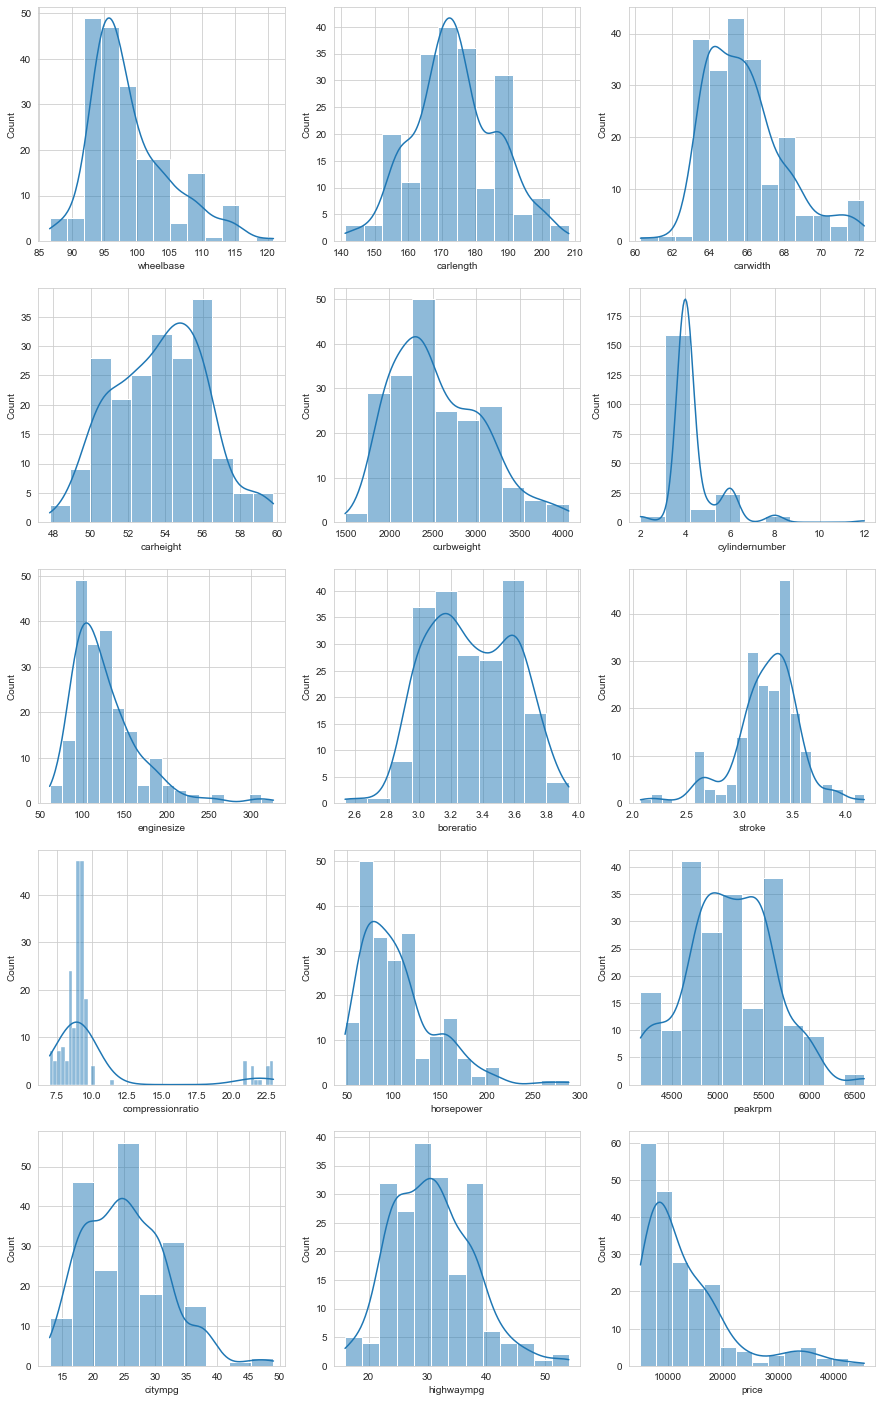

In [56]:
##Kiểm tra phân bổ của các biến numerical
cols = 3
rows = 5
num_cols = df.select_dtypes(exclude='category').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.histplot(x=df[col], ax=ax, kde=True, palette='Blues')

**Nhận xét**:<br>
    - Phân phối chuẩn (normal distribution): carlength, carwidth, carheight, curbweight, boreation, stroke, peakrpm, citympg, highwaympg <br>
    - Phân phối lệch trái: wheelbase, cylindernumber, enginesize, compressionratio (có thể có outlier), price

### 2. Bivariate analysis

#### 2.1 Numerical variables

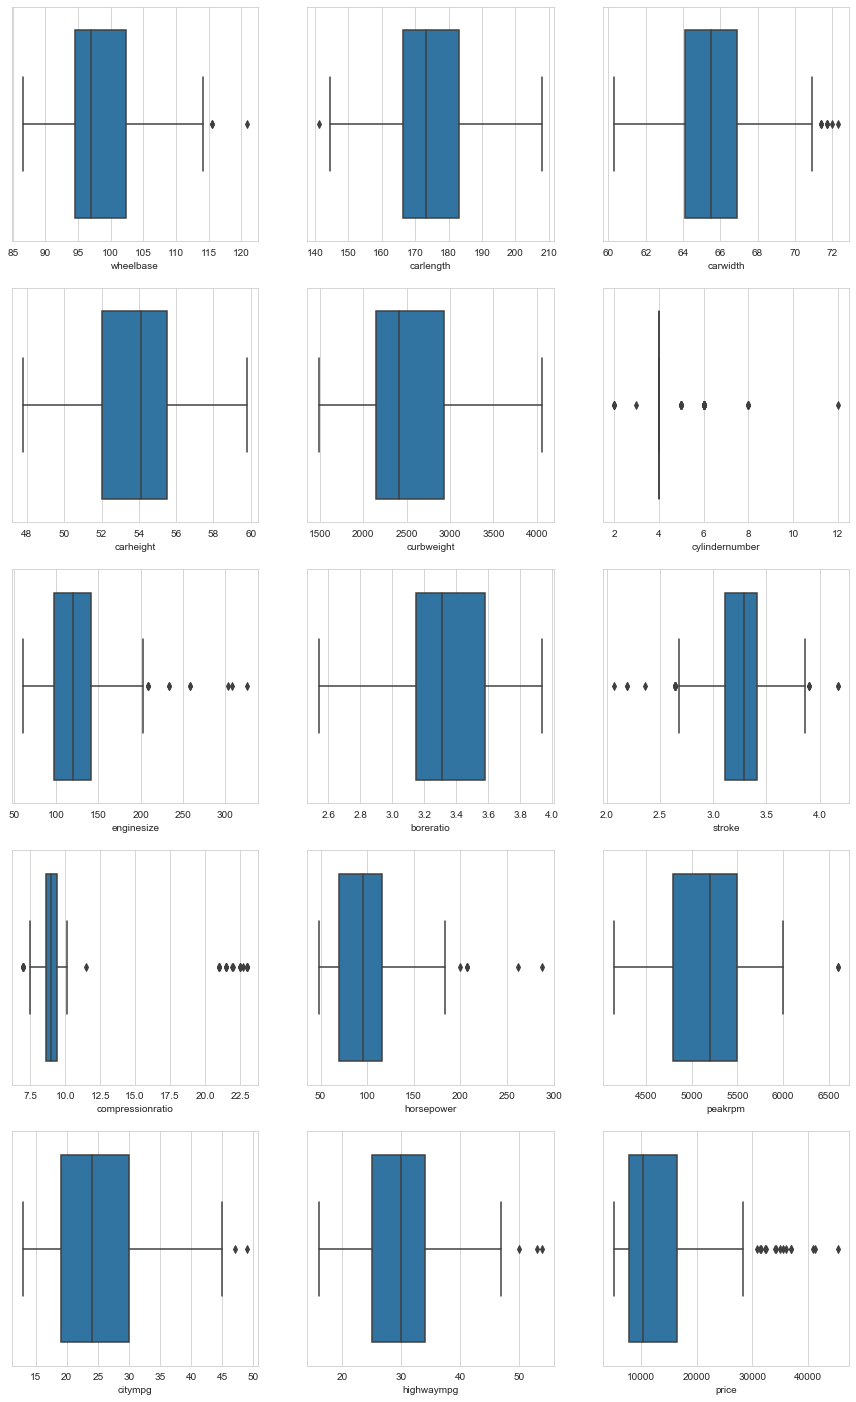

In [57]:
#Kiểm tra dữ liệu ngoại lai 
cols = 3
rows = 5
num_cols = df.select_dtypes(exclude='category').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.boxplot(x=df[col], ax=ax)

Nhận xét: dataset thuộc tính numerical có dữ liệu ngoại lai

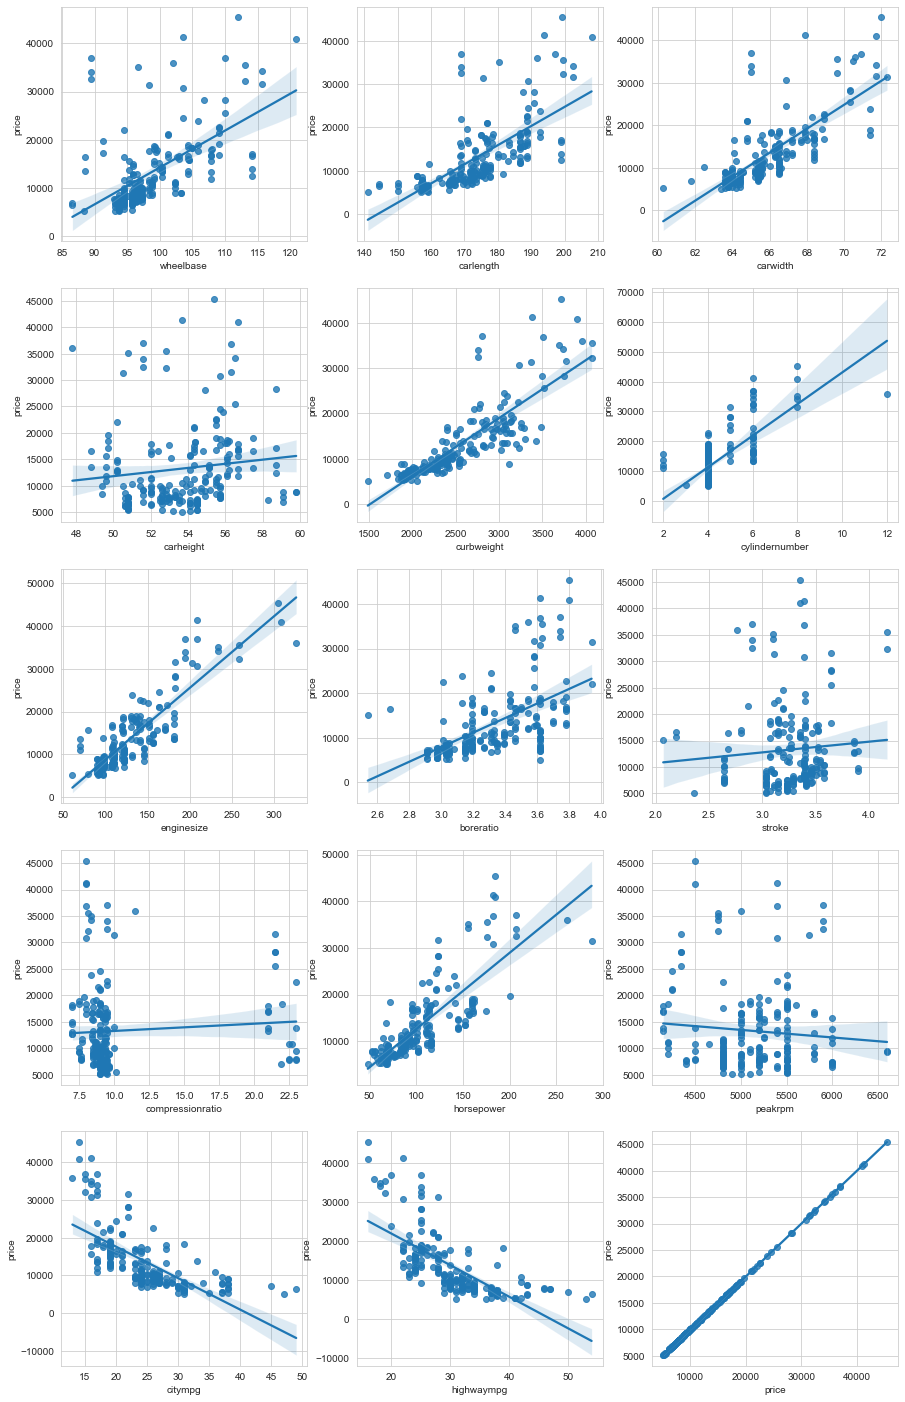

In [58]:
# Mối quan hệ giữa các biến numerical 
sns.set_style('whitegrid')
cols = 3
rows = 5
num_cols = df.select_dtypes(exclude='category').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(list(num_cols)):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.regplot(x=col, y ='price', data = df, ax=ax)
#     fig.tight_layout() 
#     plt.show()


,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.008210,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,-0.020002,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


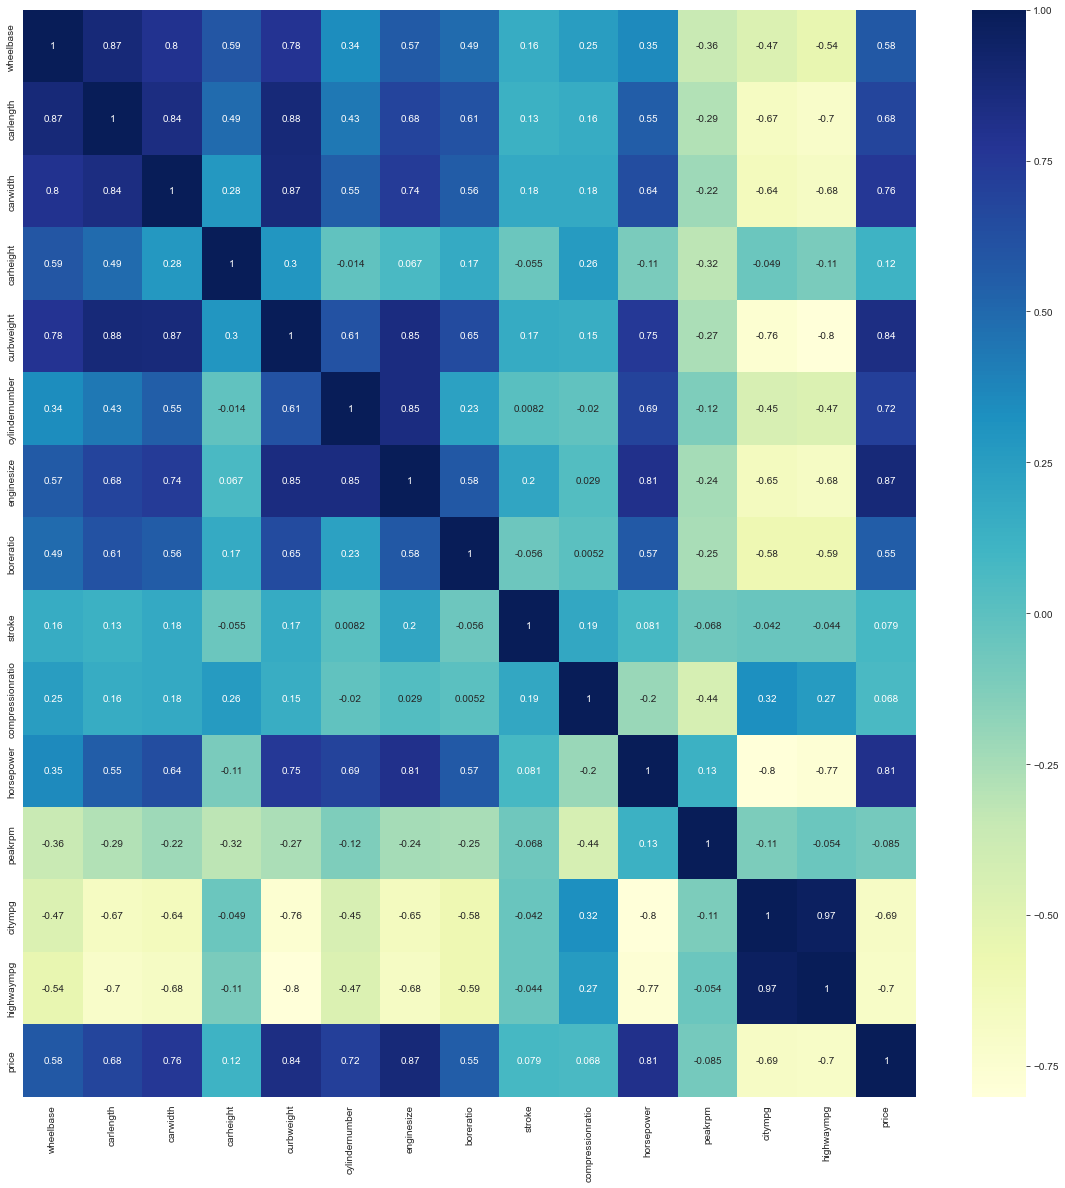

In [59]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[list[num_cols]].corr(), cmap="YlGnBu", annot=True)
df[list[num_cols]].corr()

In [60]:
from scipy import stats
def check_corelation(df, name_columns):
    result = []
    for i in name_columns:
        for j in name_columns:
            if i==j:
                continue
            r, pvalue = stats.pearsonr(df[i], df[j])
    #         print(r)
            if pvalue<0.05 and r>0.7:
                result.append(f'({i}: {j}): {r}')
    return result 

In [61]:
result = check_corelation(df, list(num_cols))
result 

['(wheelbase: carlength): 0.8745874759642631',
 '(wheelbase: carwidth): 0.7951436436169681',
 '(wheelbase: curbweight): 0.7763863277822108',
 '(carlength: wheelbase): 0.8745874759642631',
 '(carlength: carwidth): 0.8411182684818452',
 '(carlength: curbweight): 0.8777284608306426',
 '(carwidth: wheelbase): 0.7951436436169681',
 '(carwidth: carlength): 0.8411182684818452',
 '(carwidth: curbweight): 0.8670324646791239',
 '(carwidth: enginesize): 0.7354334047796366',
 '(carwidth: price): 0.7593252997415113',
 '(curbweight: wheelbase): 0.7763863277822108',
 '(curbweight: carlength): 0.8777284608306426',
 '(curbweight: carwidth): 0.8670324646791239',
 '(curbweight: enginesize): 0.8505940734262769',
 '(curbweight: horsepower): 0.7507392514434821',
 '(curbweight: price): 0.8353048793372965',
 '(cylindernumber: enginesize): 0.8460306875095442',
 '(cylindernumber: price): 0.7183049020002832',
 '(enginesize: carwidth): 0.7354334047796366',
 '(enginesize: curbweight): 0.8505940734262769',
 '(engin

In [62]:
result = check_corelation(df, list(num_cols))
result 
for i in result:
    if 'price:' in i:
        print(i)

(price: carwidth): 0.7593252997415113
(price: curbweight): 0.8353048793372965
(price: cylindernumber): 0.7183049020002832
(price: enginesize): 0.8741448025245118
(price: horsepower): 0.8081388225362217


#### Nhận xét: Các independent feature có ảnh hưởng đến dependent feature là 
- wheelbase: Chiều dài cơ sở
- carlength: Chiều dài xe
- carwidth: Chiều rộng xe
- curbweight: Trọng lượng của xe khi không có người hoặc hành lý
- enginetype: Loại động cơ
- boreration: Tỉ số hành trình
- horsepower: Mã lực 
- citympg:số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
- highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc<br>

#### Lưu ý: <br>
- Trong TH chưa loại bỏ ngoại lai (có các features chưa phân phối chuẩn, 2 đk này vi phạm assumption của pearson) nên độ chính xác bị giảm
- Các independent feature có mối tương quan với nhau<br> => đa cộng tuyến or tự tương quan trong hồi quy tuyến tính

In [63]:
num_cols = df.select_dtypes(exclude='category').columns
num_cols.values

array(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'], dtype=object)

In [64]:
# loại bỏ dữ liệu ngoại lai 
q1 = df[list(num_cols)].quantile(0.25)
q3 = df[list(num_cols)].quantile(0.75)
iqr = q3 - q1 
df_removeoutlier = df[~((df[list(num_cols)]<(q1-1.5*iqr)) | (df[list(num_cols)]>(q3+1.5*iqr))).any(axis=1)]
df_removeoutlier                      


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
11,2,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0,bmw
12,0,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16925.0,bmw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-2,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,...,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0,volvo
200,-1,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,...,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0,volvo
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo


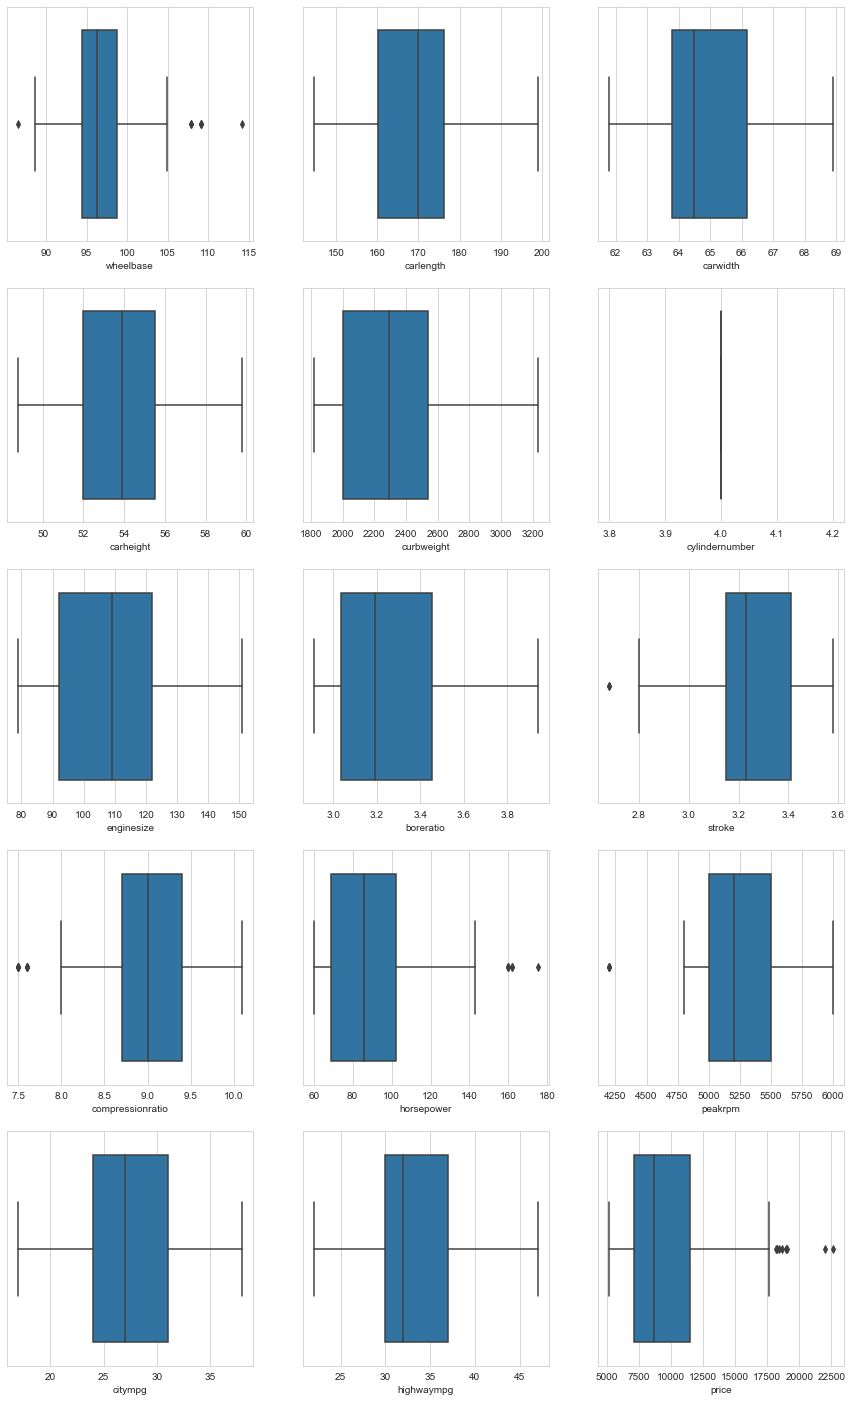

In [65]:
cols = 3
rows = 5
num_cols = df_removeoutlier.select_dtypes(exclude='category').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.boxplot(x=df_removeoutlier[col], ax=ax)

In [66]:
result = check_corelation(df_removeoutlier, list(num_cols))
for i in result:
    if 'price:' in i:
        print(i)

(price: carlength): 0.7235654166207618
(price: carwidth): 0.7425625778702258
(price: curbweight): 0.8245989608329141
(price: enginesize): 0.7416648464989026
(price: boreratio): 0.826917596228729
(price: horsepower): 0.8223879583901796


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


#### 2.2 Categorical Variables

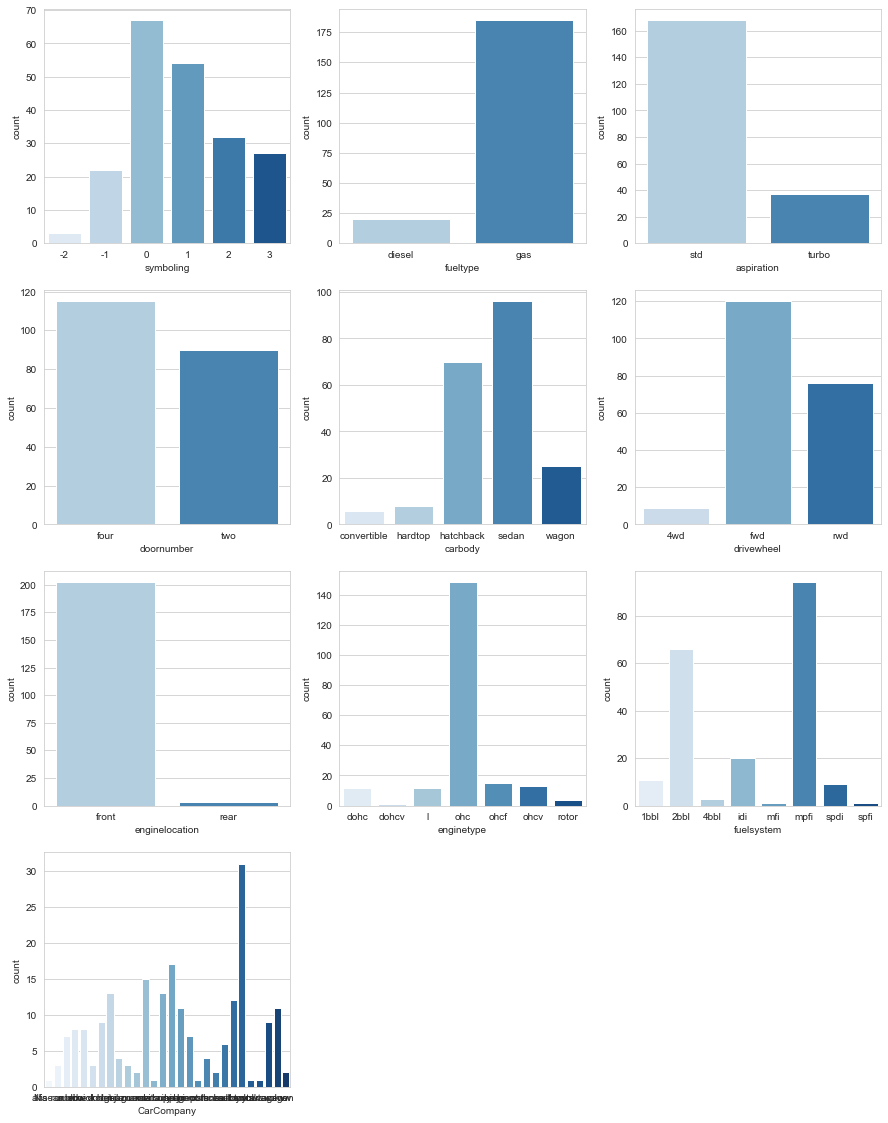

In [67]:
sns.set_style('whitegrid')
cols = 3
rows = 5
num_cols = df.select_dtypes(include='category').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(list(num_cols)):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=col, data = df, ax=ax, palette='Blues')
#     fig.tight_layout() 
#     plt.show()

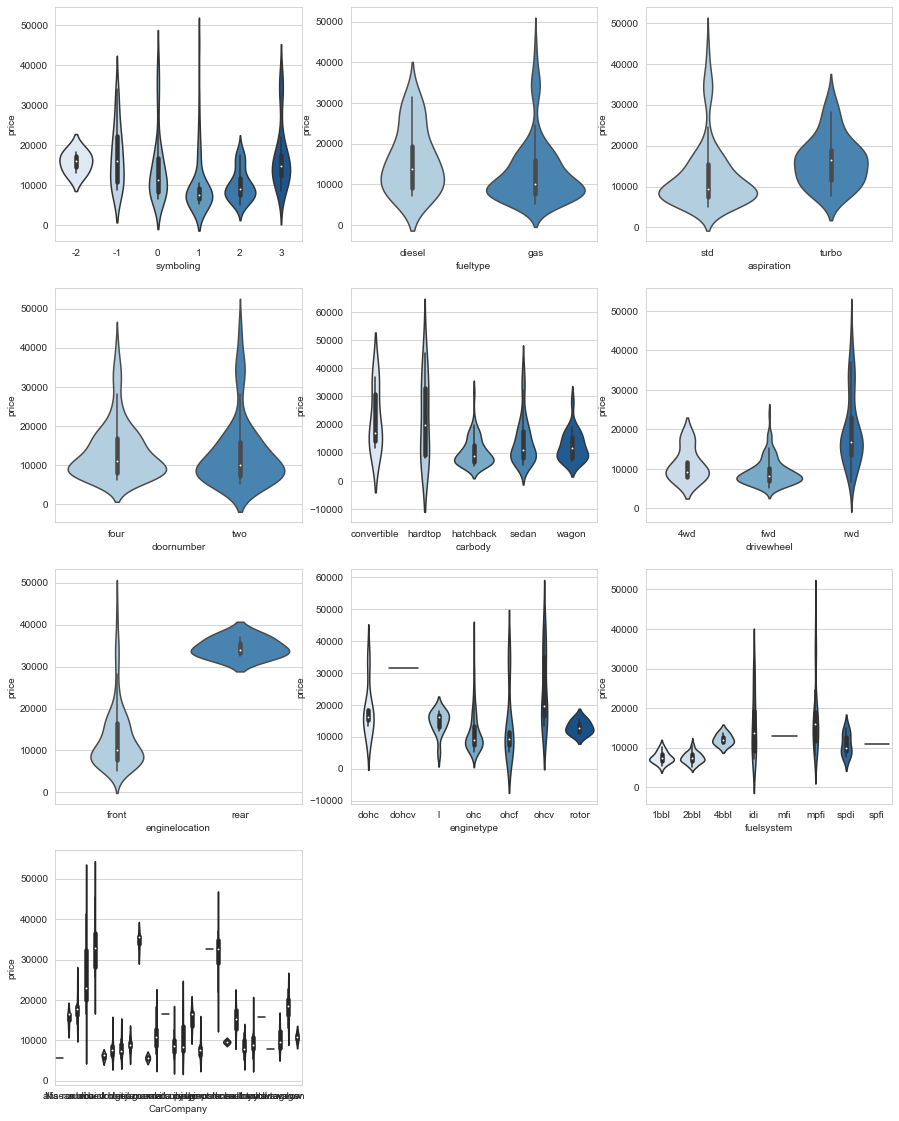

In [68]:
sns.set_style('whitegrid')
cols = 3
rows = 5
num_cols = df.select_dtypes(include='category').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(list(num_cols)):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.violinplot(x=col, y='price', data = df, ax=ax, palette='Blues')
#     fig.tight_layout() 

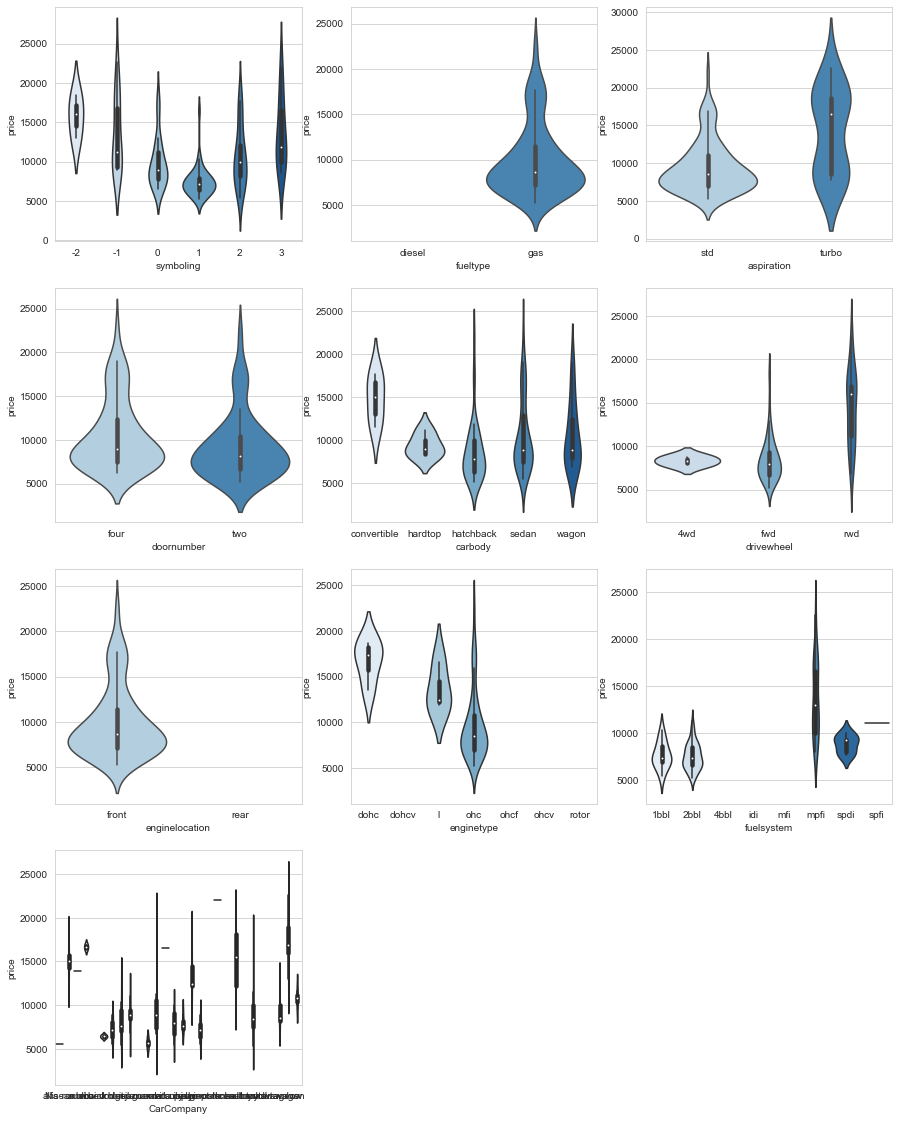

In [69]:
sns.set_style('whitegrid')
cols = 3
rows = 5
num_cols = df_removeoutlier.select_dtypes(include='category').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(list(num_cols)):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.violinplot(x=col, y='price', data = df_removeoutlier, ax=ax, palette='Blues')
#     fig.tight_layout() 

#### Kiểm định số lượng cửa xe có ảnh hưởng đến giá xe hay không:
Với mức ý nghĩa 5%:<br>
    H0: Trung bình giá của xe có số cửa xe là bốn bằng trung bình giá của xe có số cửa xe là hai<br>
    H1: Trung bình giá của xe có số cửa xe là bốn không bằng trung bình giá của xe có số cửa xe là hai
    

In [70]:
import numpy as np
a = df[df['doornumber']=='four']['price']
b = df[df['doornumber']=='two']['price']
var_a = np.var(a)
var_b = np.var(b)
ration = f'{round(var_a/var_b)}:1' if var_a>var_b else\
f'{round(var_b/var_a)}:1'
ration

'1:1'

In [71]:
stats.ttest_ind(a, b, equal_var=True)

Ttest_indResult(statistic=0.4538127430553335, pvalue=0.6504483953299085)

pvalue>0.05 chưa đủ điều kiện bác bỏ H0, kết luận H0: Trung bình giá của xe có số cửa xe là bốn bằng trung bình giá của xe có số cửa xe là hai<br>

### C. DATA PREPROCESSING

In [72]:
numerical_featurers = ['carwidth','curbweight','enginesize']
categorical_feature = ['carbody', 'enginetype', 'CarCompany']
features = numerical_featurers + categorical_feature
features

['carwidth', 'curbweight', 'enginesize', 'carbody', 'enginetype', 'CarCompany']

In [73]:
X = df[features]
y = df['price']

In [74]:
X = pd.get_dummies(X)
X.head(5)

,carwidth,curbweight,enginesize,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,...,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_toyouta,CarCompany_vokswagen,CarCompany_volkswagen,CarCompany_volvo,CarCompany_vw
car_ID,,,,,,,,,,,,,,,,,,,,,
1,64.1,2548,130,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,64.1,2548,130,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,65.5,2823,152,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,66.2,2337,109,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,66.4,2824,136,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,68.9,2952,141,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
202,68.8,3049,141,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
203,68.9,3012,173,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
# One Hot Encoding
# from sklearn.compose import make_column_transformer  
# from sklearn.preprocessing import OneHotEncoder 
# ct = make_column_transformer((OneHotEncoder(), categorical_feature), remainder='passthrough')
# X = ct.fit_transform(X)

#### Splitting the dataset (X,y) into the Training set and Test set

In [76]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_trains, X_test, y_trains, y_test = train_test_split(X, y, test_size = 0.2)

In [77]:
X_trains.head(5)

,carwidth,curbweight,enginesize,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,...,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_toyouta,CarCompany_vokswagen,CarCompany_volkswagen,CarCompany_volvo,CarCompany_vw
car_ID,,,,,,,,,,,,,,,,,,,,,
67,66.1,2700,134,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,68.4,3075,120,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,63.6,2280,92,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
97,63.8,1971,97,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,65.2,2289,110,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,67.9,3139,181,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,66.9,3055,164,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,63.8,1938,97,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y_trains

car_ID
67     18344.0
112    15580.0
154     6918.0
97      7499.0
39      9095.0
        ...   
107    18399.0
15     24565.0
93      6849.0
180    15998.0
103    14399.0
Name: price, Length: 164, dtype: float64

### Feature Scalling

Dữ liệu đang làm chưa được loại bỏ outlier, nên sẽ áp dụng RobustScaller 

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np
score = []
model = LinearRegression()
model_1 = LinearRegression()

model_1.fit(X_trains, y_trains.values.reshape(-1,1))
# model.score(X_trains, y_trains.values.reshape(-1,1))
pred = model_1.predict(X_test)
pred
score.append(metrics.mean_squared_error(y_test, pred))

norm = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

scalers = [norm, standard, robust]
#Create pipe line and fitting it on data 
for scaler in scalers:
    pipe = Pipeline([('transformer', scaler),
                     ('estimator', model)
    ])
    pipe.fit(X_trains, y_trains.values.reshape(-1,1))
    pipe.fit(X_test, y_test.values.reshape(-1,1))
    #Predict 
    pred = pipe.predict(X_test)
    score.append(metrics.mean_squared_error(y_test, pred))
# print(score)
# print(pred)
score_df = pd.DataFrame({'Score': score}, index = ["Normall",'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
score_df


,Score
Normall,9.976668e+06
MinMaxScaler,3.293661e+06
StandardScaler,3.330353e+06
RobustScaler,3.293661e+06


#### Kết quả cho thấy dùng MinMaxScaler thì sai số MSE sẽ giảm => Dùng pp MinMaxScaler để scaler dữ liệu

In [80]:
# pipe = Pipeline([('transformer', norm),
#                      ('estimator', model)
#     ])
# pipe.fit(X_trains, y_trains.values.reshape(-1,1))
#     #Predict 
# #     pred = pipe.predict(X_test)
# pipe.score(X_trains, y_trains.values.reshape(-1,1))
# pred = pipe.predict(X_test)
# np.sqrt(np.mean(np.square(y_test - pred)))

In [81]:
#Scal train và test set 

In [82]:
X_trains_columns = X_trains.columns.values.tolist()
y_trains_columns = ['price']

In [83]:
X_trains = norm.fit_transform(X_trains)
y_trains = norm.fit_transform(y_trains.values.reshape(-1,1))

In [84]:
X_trains = pd.DataFrame(X_trains, columns = X_trains_columns)
X_trains.sample(2)

,carwidth,curbweight,enginesize,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,...,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_toyouta,CarCompany_vokswagen,CarCompany_volkswagen,CarCompany_volvo,CarCompany_vw
52,0.447619,0.251891,0.203125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.628571,0.652425,0.195312,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X_test_columns = X_test.columns.values.tolist()
y_test_columns = ['price']

In [86]:
X_test = norm.fit_transform(X_test)
y_test = norm.fit_transform(y_test.values.reshape(-1,1))

In [87]:
X_test = pd.DataFrame(X_test, columns = X_trains_columns)
X_test.head(2)

,carwidth,curbweight,enginesize,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,...,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_toyouta,CarCompany_vokswagen,CarCompany_volkswagen,CarCompany_volvo,CarCompany_vw
0,0.578947,0.722222,0.599190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.666667,0.648839,0.283401,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## OLS Kiểm tra <br>

In [88]:
import statsmodels.api as sm
X = X_trains[X_trains.columns]
y = y_trains
exog = sm.add_constant(X)
estimator = sm.OLS(y, exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     84.95
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.07e-72
Time:                        14:26:09   Log-Likelihood:                 307.90
No. Observations:                 164   AIC:                            -537.8
Df Residuals:                     125   BIC:                            -416.9
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Regress Evaluate

In [89]:
model.fit(X_trains, y_trains)

LinearRegression()

In [94]:
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(f'MSE = {metrics.mean_squared_error(y_test, pred)}')

MSE = 0.00863280629426676


## Conclusion

Giá xe chịu tác động của các biến carwidth: Chiều rộng xe, curbweight: Trọng lượng của xe khi không có người hoặc hành lý, enginetype: Loại động cơ, CarCompany: tên hãng xe